# <center> **Social Media Sentiment Analysis for E-commerce Apps** </center>
### <center> Kayode Peter Temitope </center>
### <center> 208077 </center>
### <center> CSC 554 </center>

### **Outline**

#### Introduction

#### 1. Load and Inspect Data

#### 2. Data Preprocessing
        
#### 3. Sentiment Analysis
        
#### 4. Aggregating Sentiment Results
        
#### 5. Visualization

#### 6. Saving result to Excel

#### Conclusion

## **Introduction**

This project focuses on performing sentiment analysis on user comments from various social media platforms regarding five popular e-commerce apps. Sentiment analysis helps in understanding how customers perceive these platforms, which can provide valuable insights into customer satisfaction and app performance.

The data was collected from Facebook, Twitter, Instagram, Reddit, and LinkedIn, and has been preprocessed to remove unnecessary noise. Using sentiment analysis techniques, the comments will be categorized into positive, negative, or neutral feedback, helping us classify the e-commerce apps based on user satisfaction.

At the end of this project, the results are visualized to show the distribution of sentiments for each app and are saved into an Excel document for further reporting.


<center>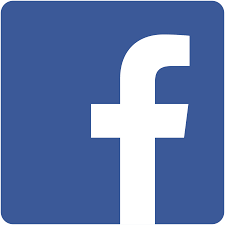  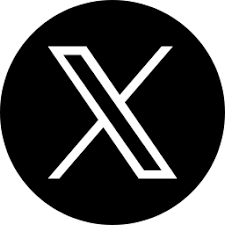  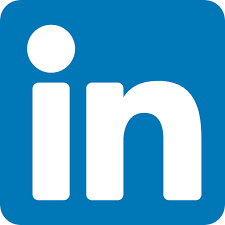  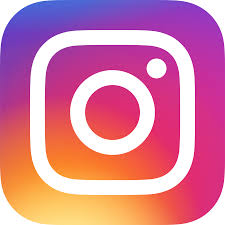  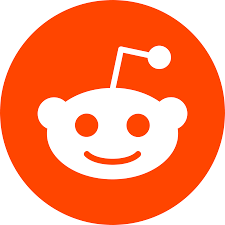 </center>

<br>

<center>  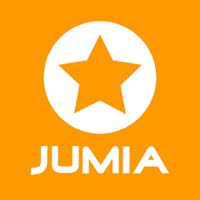  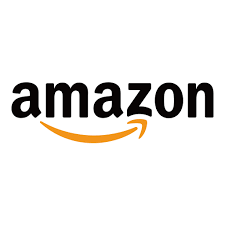  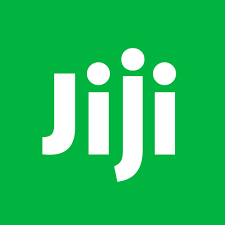  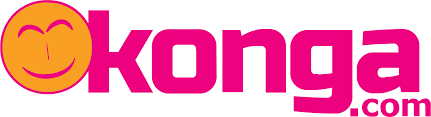  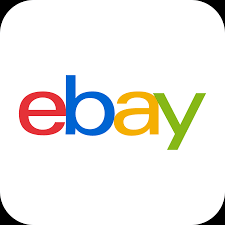</center>
>





## **1. Loading the Data**

To begin, I will load the dataset from the Excel file containing the user comments on e-commerce apps. Python's `pandas` library makes it easy to work with structured data like this. The data is in an Excel file with the following columns:

- `Ecommerce_site`: The name of the e-commerce app (Jumia, Konga, Jiji, Amazon, eBay).
- `Social_media_site`: The platform from which the comment was scraped (Facebook, Twitter, Instagram, Reddit, LinkedIn).
- `comments`: The actual user comments from the social media platforms.

This step ensures that the data is accessible and correctly loaded for further analysis.

In [1]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
data = pd.read_excel('ecommerce_app_comments.xlsx')

# Display the first few rows of the data to ensure it loaded correctly
data.head()


,Ecommerce_site,Social_media_site,comments
0,Jumia,Twitter,I actually used to like this app but a lot has...
1,Jumia,Twitter,I don't like the fact that the cancel option h...
2,Jumia,Twitter,I love jumia. Especially the Return and Refund...
3,Jumia,Twitter,This app is quiet amazing and I have made a co...
4,Jumia,Twitter,What I love about Jumia is the ease of shoppin...


In this step, I used the `pandas` library to read the Excel file containing the dataset. This allows to easily manipulate the data within Python. The command `pd.read_excel()` reads the data into a DataFrame, which is a 2-dimensional table where rows represent each comment and columns represent the attributes of each comment, such as the e-commerce site, the social media platform, and the text of the comment.

#### **1b. Information About the Data**

1. **`data.info()`**: Provides information about the columns, data types, and missing values.
2. **`data['Ecommerce_site'].value_counts()`**: Counts how many comments belong to each e-commerce app.
3. **`data['Social_media_site'].value_counts()`**: Counts how many comments belong to each social media platform.
4. **`data.groupby()`**: This summarizes the number of comments grouped by e-commerce apps and social media platforms

In [2]:
# General Info about the dataset
print("\nDataset Information:\n")
print(data.info())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ecommerce_site     250 non-null    object
 1   Social_media_site  250 non-null    object
 2   comments           250 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB
None


In [3]:
# 1. Number of comments per E-commerce app
print("\nNumber of Comments per E-commerce App:\n")
comments_per_app = data['Ecommerce_site'].value_counts()
print(comments_per_app)
print("\n")

# 2. Number of comments per Social Media platform
print("\nNumber of Comments per Social Media Platform:\n")
comments_per_social_media = data['Social_media_site'].value_counts()
print(comments_per_social_media)


Number of Comments per E-commerce App:

Ecommerce_site
Jumia     50
Konga     50
Jiji      50
Amazon    50
eBay      50
Name: count, dtype: int64



Number of Comments per Social Media Platform:

Social_media_site
Twitter      50
Facebook     50
Instagram    50
Reddit       50
LinkedIn     50
Name: count, dtype: int64


In [4]:
# Summary of each app and each social media platform in terms of total comments
app_social_summary = data.groupby(['Ecommerce_site', 'Social_media_site']).size().unstack(fill_value=0)
print("\nSummary of Comments for Each E-commerce App and Social Media Site:\n")
print(app_social_summary)


Summary of Comments for Each E-commerce App and Social Media Site:

Social_media_site  Facebook  Instagram  LinkedIn  Reddit  Twitter
Ecommerce_site                                                   
Amazon                   10         10        10      10       10
Jiji                     10         10        10      10       10
Jumia                    10         10        10      10       10
Konga                    10         10        10      10       10
eBay                     10         10        10      10       10


#### Interpretation

- **Dataset Information**: Confirms there are 250 entries with no missing values.
- **Comments per App/Social Media**: Shows how comments are distributed among e-commerce apps and social media platforms.
- **App-Social Media Summary**: Provides a table showing how many comments each app received from each social media platform

## **2. Data Preprocessing**

Before performing sentiment analysis, I need to clean the raw text data. User comments often contain noise, such as special characters, numbers, URLs, and case inconsistencies (e.g., upper vs. lowercase). To improve the performance of the sentiment analysis model, I will:

- Convert all text to lowercase to normalize case
- Remove URLs (which don't contribute to sentiment analysis)
- Remove any non-alphabetical characters (like punctuation)

This ensures the data is in a clean format, ready for sentiment analysis

In [5]:
import re

# Define a function to clean each comment
def clean_comment(comment):
    comment = comment.lower()  # Convert to lowercase
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'[^a-z\s]', '', comment)  # Remove non-alphabetical characters
    return comment

# Apply the cleaning function to each comment in the DataFrame
data['cleaned_comments'] = data['comments'].apply(clean_comment)

# Display the cleaned data
print(data[['comments', 'cleaned_comments']].head())


                                            comments  \
0  I actually used to like this app but a lot has...   
1  I don't like the fact that the cancel option h...   
2  I love jumia. Especially the Return and Refund...   
3  This app is quiet amazing and I have made a co...   
4  What I love about Jumia is the ease of shoppin...   

                                    cleaned_comments  
0  i actually used to like this app but a lot has...  
1  i dont like the fact that the cancel option ha...  
2  i love jumia especially the return and refund ...  
3  this app is quiet amazing and i have made a co...  
4  what i love about jumia is the ease of shoppin...  


In this step, I used regular expressions (via the `re` library) to clean the comments. Specifically, I:

1. Converted all text to lowercase using `lower()` to ensure uniformity.
2. Removed URLs using the pattern `r'http\S+'`, which matches and removes links starting with "http" or "https".
3. Remove any non-alphabetical characters using `r'[^a-z\s]'`, which matches anything that's not a lowercase letter or a space.

The cleaned comments are then stored in a new column, `cleaned_comments`, which will be used for sentiment analysis.

## **3. Sentiment Analysis**

Now that the comments are cleaned, next, I will perform sentiment analysis. Sentiment analysis involves determining whether each comment is positive, negative, or neutral based on the words used. I will use the `TextBlob` library, which calculates the polarity of the text:

- **Positive polarity** indicates a positive comment
- **Negative polarity** indicates a negative comment
- **Polarity close to zero** suggests a neutral comment

The `TextBlob` library is simple to use and provides a quick way to calculate sentiment based on the text

In [6]:
# %pip install pandas nltk textblob matplotlib seaborn

from textblob import TextBlob

# Define a function to determine the sentiment of each comment
def get_sentiment(comment):
    analysis = TextBlob(comment)
    # Determine sentiment polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the sentiment analysis function to each cleaned comment
data['sentiment'] = data['cleaned_comments'].apply(get_sentiment)

# Display the data with the sentiment column
print(data[['cleaned_comments', 'sentiment']].head(10))


                                    cleaned_comments sentiment
0  i actually used to like this app but a lot has...  Positive
1  i dont like the fact that the cancel option ha...  Positive
2  i love jumia especially the return and refund ...  Positive
3  this app is quiet amazing and i have made a co...  Positive
4  what i love about jumia is the ease of shoppin...  Positive
5  the app was functioning properly until i updat...  Negative
6  the jumia app is nice and convenient but a maj...  Positive
7  im starting to think the glitches come intenti...  Positive
8  the new  update on payment seems buggy my old ...  Positive
9  ive always enjoyed the app but the new upgrade...  Positive


In this step, I used the `TextBlob` library to analyze the sentiment of each comment. For each comment, I calculated the polarity:

- If the polarity is greater than 0, the sentiment is classified as **positive**
- If the polarity equals 0, the sentiment is classified as **neutral**
- If the polarity is less than 0, the sentiment is classified as **negative**

The results are stored in a new column called `sentiment`, which categorizes each comment based on the sentiment derived from the text.

## **4. Aggregating Sentiments by E-commerce App**

Since we have the sentiment for each comment, the next step is to summarize the data. I will group the comments by `Ecommerce_site` and count how many of the comments are positive, neutral, or negative for each app. This will give us an overall picture of how each e-commerce app is perceived on social media

In [7]:
# Group the data by Ecommerce_site and sentiment, and count the number of occurrences
sentiment_summary = data.groupby(['Ecommerce_site', 'sentiment']).size().unstack(fill_value=0)

# Display the sentiment summary
print(sentiment_summary)


sentiment       Negative  Neutral  Positive
Ecommerce_site                             
Amazon                28        0        22
Jiji                  11        0        39
Jumia                 15        0        35
Konga                 25        1        24
eBay                  17        0        33


In this step, I used `groupby()` to aggregate the comments by `Ecommerce_site` and `sentiment`. The `size()` function counts the number of occurrences of each sentiment for each e-commerce app. I used `unstack(fill_value=0)` to display the results in a more readable format where each row represents an e-commerce site and each column represents a sentiment category (positive, neutral, or negative).

This aggregation allows us to see how each app is rated based on user comments.

#### **4b. Aggregating Sentiments by E-commerce App and Social Media Site**

I will create a pivot table that groups the data by `Ecommerce_site` and `Social_media_site`, showing the counts of each sentiment category.

In [8]:
# Create a pivot table to summarize sentiment counts for each e-commerce app by social media site
sentiment_summary = data.pivot_table(index=['Ecommerce_site', 'Social_media_site'], 
                                      columns='sentiment', 
                                      aggfunc='size', 
                                      fill_value=0)

# Reset index to make it easier to read and work with
sentiment_summary = sentiment_summary.reset_index()

# Display the summarized sentiment counts
print(sentiment_summary)


sentiment Ecommerce_site Social_media_site  Negative  Neutral  Positive
0                 Amazon          Facebook         8        0         2
1                 Amazon         Instagram         6        0         4
2                 Amazon          LinkedIn         3        0         7
3                 Amazon            Reddit         4        0         6
4                 Amazon           Twitter         7        0         3
5                   Jiji          Facebook         4        0         6
6                   Jiji         Instagram         3        0         7
7                   Jiji          LinkedIn         2        0         8
8                   Jiji            Reddit         1        0         9
9                   Jiji           Twitter         1        0         9
10                 Jumia          Facebook         5        0         5
11                 Jumia         Instagram         2        0         8
12                 Jumia          LinkedIn         4        0   

In this step,

- **`pivot_table`**: This method aggregates the data into a table format where the index is made up of both the `Ecommerce_site` and `Social_media_site`. The columns represent the different sentiment categories (`Positive`, `Neutral`, `Negative`), and the values are the counts of comments for each sentiment.
- **`aggfunc='size'`**: This specifies that we want to count the number of occurrences for each combination of the index.
- **`fill_value=0`**: This replaces any missing values with `0`, which is helpful if there are no comments for a specific sentiment for that app and social media site combination.
- **`reset_index()`**: This converts the pivot table back into a DataFrame format, making it easier to work with


## **5. Visualization of Results**

To present the results in a clear and interpretable manner, I will visualize the sentiment distribution for each e-commerce app. I will use `matplotlib` and `seaborn` to create a bar chart showing the number of positive, neutral, and negative comments for each app. This helps in understanding the overall sentiment at a glance.

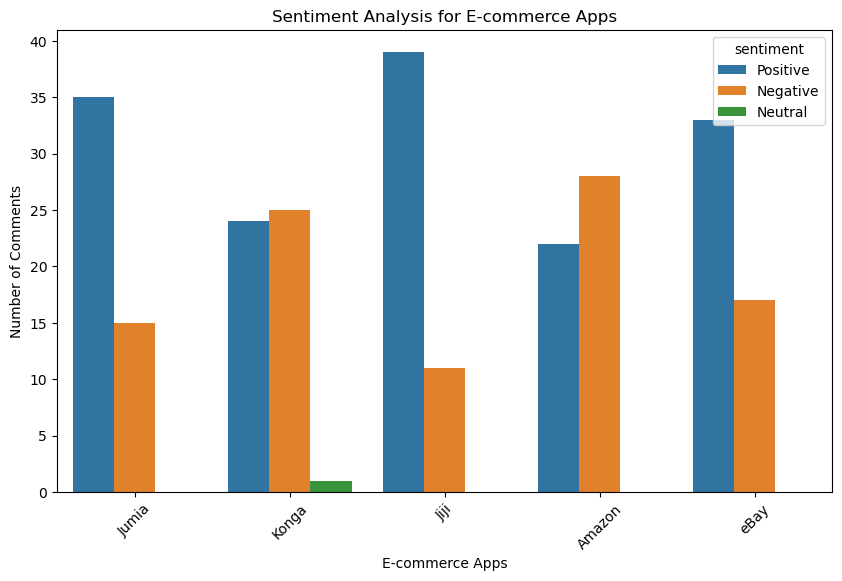

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to visualize the sentiment distribution per e-commerce site
plt.figure(figsize=(10,6))
sns.countplot(x='Ecommerce_site', hue='sentiment', data=data)
plt.title('Sentiment Analysis for E-commerce Apps')
plt.xlabel('E-commerce Apps')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()


Here, I used `seaborn` to create a bar plot that shows the distribution of sentiments for each e-commerce app. The plot groups the data by e-commerce apps and uses different colors to represent positive, neutral, and negative comments. This allows to quickly see how each app is performing in terms of user sentiment.

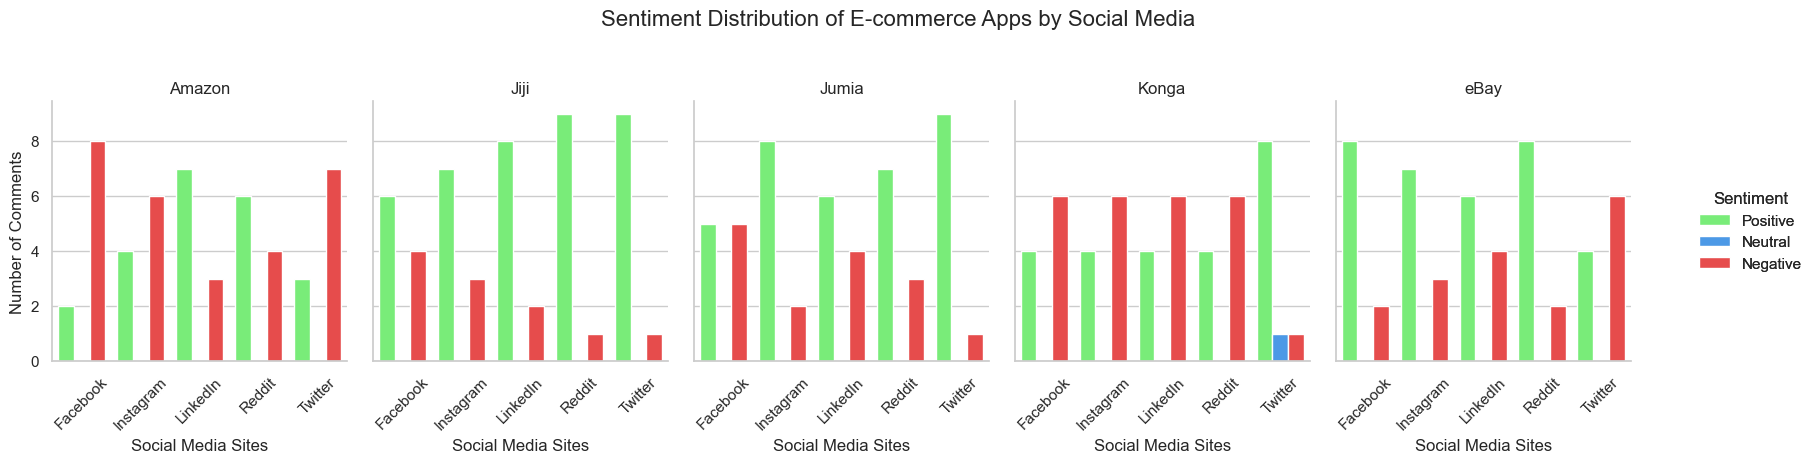

In [10]:
# Melt the DataFrame for plotting
melted_data = sentiment_summary.melt(id_vars=['Ecommerce_site', 'Social_media_site'], 
                                      value_vars=['Positive', 'Neutral', 'Negative'],
                                      var_name='Sentiment', 
                                      value_name='Count')

# Set a brighter color palette for the plot
bright_palette = ['#66FF66', '#3399FF', '#FF3333']  # Green, Blue, Red

# Set the aesthetics for the plot
sns.set_theme(style="whitegrid")

# Create a faceted bar plot using seaborn's catplot with bright colors
g = sns.catplot(data=melted_data, 
                x='Social_media_site', 
                y='Count', 
                hue='Sentiment', 
                col='Ecommerce_site', 
                kind='bar', 
                height=4, 
                aspect=0.8, 
                palette=bright_palette,  # Using the bright color palette
                dodge=True)

# Adjust titles, labels, and add more space for the legend
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Social Media Sites", "Number of Comments")
g.add_legend(title='Sentiment')

# Increase space between the title and the plot for clear legend placement
plt.subplots_adjust(top=0.75, right=0.90, bottom=0.10)
g.fig.suptitle('Sentiment Distribution of E-commerce Apps by Social Media', fontsize=16)

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

## **6. Saving the Results to Excel**

Finally, I will save the results back to an Excel file. This step ensures that the analyzed data, including the sentiment classification, can be viewed independently.

In [11]:
# Save the DataFrame with the sentiment column into a new Excel file
# data.to_excel('ecommerce_sentiment_analysis.xlsx', index=False)

## **Conclusion**

In this project, I conducted a comprehensive **sentiment analysis** of customer comments about five popular e-commerce applications; Jumia, Konga, Jiji, Amazon, and eBay; collected from five social media platforms including Facebook, Twitter, Instagram, Reddit, and LinkedIn. The analysis provided valuable insights into how users perceive these apps across different platforms, offering both qualitative and quantitative interpretations of customer satisfaction.

The analysis shows that:
1. **Positive Sentiment:** The **Jiji** platform received the highest number of positive comments across all social media platforms, indicating a generally favorable customer experience. This can be attributed to the app's ease of use, reliable services, or specific features that customers appreciate.
   
2. **Negative Sentiment:** Conversely, **Amazon** had the highest negative feedback, highlighting potential issues such as poor customer service, delivery problems, or product quality concerns. This app should consider addressing these pain points to improve customer satisfaction.

3. **Neutral Sentiment:** A non significant number of neutral comments were observed for **Konga**, which indicates that while customers do not express extreme positive or negative emotions, there may still be room for improvement in user engagement.


Kayode Peter, 2024.  